# Simple Statistics

Typografen richtten vanaf 1837 in verschillende steden in Nederland een vereniging op voor onderlinge hulp bij ziekte en voor het organiseren van het Kopperfeest op de eerste maandag na Driekoningen, maar ook andere gelegenheden. Bij feesten zongen zij eigen geschreven teksten op bekende melodieen. Ik probeer zoveel mogelijk van deze teksten, in ieder geval tot 1869 machineleesbaar in te voeren. Daarbij houd ik een CSV-bestand bij van alle liedjes, met daarin de volgende velden: (item,id,titel,wijze,jaartal,schrijver,vereniging_schrijver)
* URL in Zotero
* Identifier van het liedje, opgebouwd uit een code voor de typografische vereniging (indien van toepassing), het titelwoord van het boekje, het jaartal van uitgave en het volgnummer van het liedje in het bewust boekje.
* Titel van het liedje
* Wijze van de melodie
* Jaartal van schrijven
* Schrijver
* Vereniging van de schrijver

Deze notebook geeft een overzicht van de data die ik weet over de liedjes (die tot nu toe zijn ingevoerd). Allereerst lees ik de data in een pandas dataframe.

In [1]:
import pandas as pd

df = pd.read_csv("../../data/liedjes/liedjes.csv")

Ik wil een overzicht van het aantal liedjes per jaar en per vereniging. Maar eerst: hoeveel liedjes zijn er in totaal en van hoeveel weten we het jaartal en van hoeveel weten we de vereniging.

In [2]:
len(df)

449

In [3]:
df['jaartal'].count()

444

In [4]:
df['vereniging_schrijver'].count()

445

In [5]:
draaitabel = pd.crosstab(df['vereniging_schrijver'], df['jaartal'], margins = True)
draaitabel

jaartal,1848,1849,1850,1851,1852,1853,1854,1855,1856,1857,1858,1859,1860,1861,1862,1863,186?,All
vereniging_schrijver,,,,,,,,,,,,,,,,,,
amsterdam1847,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12
amsterdam1849,0,0,0,6,22,0,0,0,16,16,0,13,0,12,0,1,0,86
amsterdam1857-1,0,0,0,0,0,0,0,0,0,0,12,18,7,24,0,1,2,64
arnhem1849,0,0,0,0,0,0,0,0,4,0,0,11,0,0,0,0,0,15
denbosch1849,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2
denhaag1843,0,0,0,0,0,0,0,0,11,0,0,0,0,0,0,0,0,11
haarlem1851,0,0,0,0,0,4,0,0,11,0,0,0,8,0,0,0,0,23
leiden1854,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,3
middelburg1847,2,3,8,2,4,6,10,6,6,6,6,2,5,4,3,15,0,88


Het aantal liedjes in deze draaitabel (aka kruistabel) is niet hetzelfde als de lengte van de dataframe, omdat niet van alle liedjes een jaartal en/of een vereniging bekend is.

In [6]:
# de functie value_counts() ordent op de waarde
df['jaartal'].value_counts()

1856    80
1859    44
1854    42
1861    40
1853    37
1860    35
1858    33
1855    28
1852    27
1857    23
1863    17
1848    14
1851     8
1850     8
1862     3
1849     3
186?     2
Name: jaartal, dtype: int64

<AxesSubplot:xlabel='jaartal'>

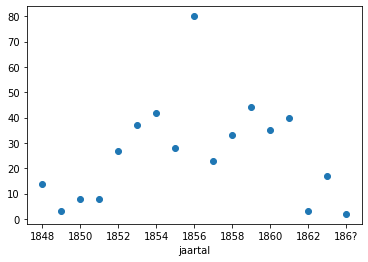

In [7]:
df.groupby('jaartal').size().plot(style = "o")

Nu per vereniging:

<AxesSubplot:xlabel='vereniging_schrijver'>

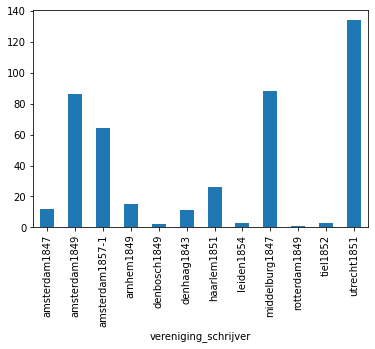

In [8]:
# df['vereniging_schrijver'].value_counts().plot(kind = 'bar')

df.groupby('vereniging_schrijver').size().plot(kind = "bar") 

Welke auteurs hebben meer dan vier liedjes geschreven?

In [14]:
df['schrijver'].value_counts().loc[lambda x : x > 4]

M. Smidt            26
J.H.C. Venman       25
C. Mommaas          24
J.C. Paap           12
J. Breeman           9
P.G. van de Kamp     9
B. Lageman           8
J.H. Regenboog       6
J.H.F. Bartels       5
R. Ruitenschild      5
J.P. Dieterich       5
W. Farber            5
J.P. Nobels          5
J.H. Dortmond        5
Name: schrijver, dtype: int64

In [10]:
df['wijze'].value_counts().loc[lambda x : x > 5]

Wien Neerlands bloed                       58
Henri's drinklied                          37
De wereld is in rep en roer                30
Io Vivat                                   28
Wie praalt aan 't hoofd der Heldenstoet    13
De Koning leef                             13
God save the king                          10
Eens werd er aan de zeeuwsche kust          9
Wij leven vrij, wij leven blij              8
Schep vreugde in 't leven                   8
Wij zijn lustig                             6
Name: wijze, dtype: int64

In [11]:
df_subset = df.groupby("wijze").filter(lambda x: len(x) > 5)
draaitabel = pd.crosstab(df_subset['wijze'], df_subset['jaartal'], margins = True)
draaitabel

jaartal,1848,1849,1850,1851,1852,1853,1854,1855,1856,1857,1858,1859,1860,1861,1862,1863,All
wijze,,,,,,,,,,,,,,,,,
De Koning leef,0,0,0,0,0,3,2,1,4,0,0,0,1,0,0,1,12
De wereld is in rep en roer,1,0,0,0,2,0,1,2,8,2,4,4,1,4,1,0,30
Eens werd er aan de zeeuwsche kust,0,0,0,0,1,1,0,1,4,1,1,0,0,0,0,0,9
God save the king,1,0,1,1,0,2,1,2,0,0,0,0,1,1,0,0,10
Henri's drinklied,0,0,0,0,3,1,5,0,9,5,2,5,2,4,0,1,37
Io Vivat,2,1,0,0,0,3,3,2,2,0,4,4,4,2,0,1,28
Schep vreugde in 't leven,0,0,1,0,0,0,1,0,2,1,1,0,0,2,0,0,8
Wie praalt aan 't hoofd der Heldenstoet,0,0,0,1,1,2,1,0,2,1,1,2,1,1,0,0,13
Wien Neerlands bloed,0,0,1,3,2,4,5,0,11,2,2,10,6,7,1,4,58


Hoeveel boekjes zijn er gedigitaliseerd en welke boekjes zijn dat? Het staat niet in de liedjes-csv, maar kan worden afgeleid uit de id's van de liedjes. Elke identifier begint immers met een identifier van het boekje. Dus: we knippen de id op langs het "-"-teken en plakken alles weer aan elkaar, behalve de laatste.

In [12]:
liedjesList = df['id'].tolist()
boekjesList = []
for liedje in liedjesList:
    liedjeSplit = liedje.split("-")
    boekje = liedjeSplit[0]
    for i in range(len(liedjeSplit) - 2): boekje = boekje + "-" + liedjeSplit[i + 1]
    if not (boekje in boekjesList): boekjesList.append(boekje)
boekjesList.sort()
boekjesList

['??-herinnering',
 'album1856',
 'amsterdam1847-reglement1848',
 'amsterdam1849-feestbundel1851',
 'amsterdam1849-feestliederen1852',
 'amsterdam1849-feestliederen1857',
 'amsterdam1849-feestliederen1859',
 'amsterdam1849-hoezee1863',
 'amsterdam1857-1-feestboekje1859',
 'amsterdam1857-1-feestboekje1861',
 'amsterdam1857-1-feestlied1863',
 'amsterdam1857-1-feestliederen1860',
 'amsterdam1857-1-feestliederen1861',
 'amsterdam1857-1-feestzangen1859',
 'amsterdam1857-1-klagt',
 'amsterdam1857-1-liederen1858',
 'amsterdam1857-1-liederen1858b',
 'amsterdam1857-1-volkslied1861',
 'amtserdam1849-feestliederen1861',
 'arnhem1849-zangcoupletten1856',
 'arnhem1849-zangstukjes1859',
 'haarlem1851-feestliederen1860',
 'haarlem1851-iisgdossier',
 'middelburg1847-feestbundel1864',
 'utrecht1851-feestbundel1855',
 'utrecht1851-feestzangen1853',
 'utrecht1851-feestzangen1854',
 'utrecht1851-feestzangen1856',
 'utrecht1851-feestzangen1858',
 'utrecht1851-feestzangen1860']

In [13]:
len(boekjesList)

30